## Load the Stack Overflow Annual Developer Survey 2023 dataset.



### Import necessary libraries and set initial configurations.

In [1]:
import pandas as pd

survey_raw_df: pd.DataFrame = pd.read_csv("survey_results_public.csv")
survey_raw_df


,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89179,89180,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Bootstrapping a business;Freelance/contr...,"Associate degree (A.A., A.S., etc.)",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN
89180,89181,I agree,I am a developer by profession,18-24 years old,"Student, full-time;Employed, part-time","Hybrid (some remote, some in-person)",School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Online Courses or Certification;Othe...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
89181,89182,I agree,I code primarily as a hobby,Prefer not to say,I prefer not to say,NaN,NaN,Something else,Books / Physical media;Hackathons (virtual or ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN
89182,89183,I agree,I am a developer by profession,Under 18 years old,"Employed, part-time;Student, part-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Secondary school (e.g. American high school, G...",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN


In [2]:
display(survey_raw_df.columns.unique())
len(survey_raw_df.columns.unique())

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

84

In [3]:
survey_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

## Data Preparation & Cleaning

In [61]:
survey_raw_df.Country.unique()

185

In [4]:
schema_2023: pd.DataFrame = pd.read_csv("survey_results_schema.csv")
schema_2023

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID310,Q310,"<div><span style=""font-size:19px;""><strong>You...",False,DB,TB
3,QID312,Q120,,True,MC,SAVR
4,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
...,...,...,...,...,...,...
73,QID289,Knowledge_7,Waiting on answers to questions often causes i...,NaN,MC,MAVR
74,QID289,Knowledge_8,I feel like I have the tools and/or resources ...,NaN,MC,MAVR
75,QID290,Frequency_1,Needing help from people outside of your immed...,NaN,MC,MAVR
76,QID290,Frequency_2,Interacting with people outside of your immedi...,NaN,MC,MAVR


In [36]:
schema_2023.loc[schema_2023.question.str.contains("age"),"question"]

0     <div><span style="font-size:19px;"><strong>Hel...
6                                   What is your age? *
26    Which <b>programming, scripting, and markup la...
34    Which <b>collaborative work management and/or ...
38    <span style="font-size:22px; font-family: aria...
44    <span style="font-size:22px; font-family: aria...
55    Are you an individual contributor or people ma...
59    On an average day, how much time do you typica...
60    On an average day, how much time do you typica...
Name: question, dtype: object

In [5]:
from typing import List

selected_columns: List[str] = [
    # Demographics
    'ResponseId','Country','Age','MainBranch','EdLevel',
     # Programming experience
    'YearsCode','YearsCodePro','LanguageHaveWorkedWith','LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',"AIToolInterested in Using",
    #  Employment 
    'Employment','DevType','RemoteWork',"ProfessionalTech"]

len(selected_columns)

15

In [6]:
survey_df: pd.DataFrame = survey_raw_df[selected_columns].copy()
survey_df.sample(10)

,ResponseId,Country,Age,MainBranch,EdLevel,YearsCode,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,AIToolInterested in Using,Employment,DevType,RemoteWork,ProfessionalTech
14688,14689,Germany,35-44 years old,I am a developer by profession,"Secondary school (e.g. American high school, G...",20,17,C#;HTML/CSS;Java;JavaScript;SQL,C#;HTML/CSS;Java;JavaScript;Rust;SQL,Microsoft SQL Server;MySQL,Learning about a codebase;Writing code;Documen...,"Employed, full-time","Developer, back-end","Hybrid (some remote, some in-person)",NaN
78078,78079,Pakistan,Under 18 years old,I code primarily as a hobby,"Secondary school (e.g. American high school, G...",3,NaN,Bash/Shell (all shells);C;HTML/CSS;Java,Bash/Shell (all shells);C;Elixir;Go;Java;JavaS...,NaN,NaN,"Student, full-time",NaN,NaN,NaN
14376,14377,United States of America,18-24 years old,I am a developer by profession,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,3,Java;JavaScript;Python;R;Ruby;Rust,Java;JavaScript;Python;R;Ruby;Rust,MongoDB;MySQL;PostgreSQL,NaN,"Employed, part-time","Developer, full-stack","Hybrid (some remote, some in-person)",NaN
23438,23439,Brazil,18-24 years old,I am a developer by profession,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,2,Dart;HTML/CSS;JavaScript;TypeScript,Dart;HTML/CSS;JavaScript;Swift;TypeScript,NaN,Testing code;Committing and reviewing code;Dep...,"Employed, full-time","Developer, front-end",Remote,DevOps function;Microservices;Automated testin...
40556,40557,United States of America,45-54 years old,I am a developer by profession,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",35,32,C#;HTML/CSS;SQL,C#;HTML/CSS;SQL,Microsoft SQL Server,NaN,"Employed, full-time","Developer, back-end",Remote,DevOps function;Microservices;Developer portal...
44281,44282,United Kingdom of Great Britain and Northern I...,18-24 years old,"I am not primarily a developer, but I write co...",Some college/university study without earning ...,8,NaN,Bash/Shell (all shells);C;Go;Haskell;Java;Java...,Bash/Shell (all shells);C;Crystal;Haskell;Java...,PostgreSQL,NaN,"Student, full-time",NaN,NaN,NaN
59089,59090,Viet Nam,18-24 years old,"I am not primarily a developer, but I write co...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,3,Bash/Shell (all shells);C;C++;HTML/CSS;Java;Ja...,Assembly;Bash/Shell (all shells);C;C++;HTML/CS...,Microsoft Access;Microsoft SQL Server;MongoDB;...,Project planning;Documenting code;Testing code...,"Employed, full-time",Scientist,In-person,None of these
77922,77923,Israel,25-34 years old,I am a developer by profession,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,6,Go;JavaScript;Ruby,Ruby,PostgreSQL;Snowflake,NaN,"Employed, full-time","Developer, back-end",Remote,DevOps function;Microservices;Continuous integ...
1675,1676,France,25-34 years old,I am a developer by profession,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,7,C#;Rust;SQL,Bash/Shell (all shells);Rust;SQL;TypeScript,Oracle;PostgreSQL,NaN,"Independent contractor, freelancer, or self-em...","Developer, full-stack","Hybrid (some remote, some in-person)",NaN
33107,33108,United Kingdom of Great Britain and Northern I...,25-34 years old,I am a developer by profession,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,5,Bash/Shell (all shells);C#;Dart;HTML/CSS;JavaS...,C#;F#;Lua;Rust;TypeScript,Cosmos DB;Microsoft SQL Server;PostgreSQL;Redis,Documenting code;Testing code;Committing and r...,"Employed, full-time","Developer, full-stack","Hybrid (some remote, some in-person)",Automated testing;Continuous integration (CI) ...


In [83]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ResponseId                 89184 non-null  int64 
 1   Country                    87973 non-null  object
 2   Age                        89184 non-null  object
 3   MainBranch                 89184 non-null  object
 4   EdLevel                    87973 non-null  object
 5   YearsCode                  87435 non-null  object
 6   YearsCodePro               66136 non-null  object
 7   LanguageHaveWorkedWith     87140 non-null  object
 8   LanguageWantToWorkWith     80709 non-null  object
 9   DatabaseHaveWorkedWith     73435 non-null  object
 10  AIToolInterested in Using  32783 non-null  object
 11  Employment                 87898 non-null  object
 12  DevType                    76872 non-null  object
 13  RemoteWork                 73810 non-null  object
 14  Profes

In [7]:
survey_df["YearsCode"] = pd.to_numeric(survey_df["YearsCode"],errors="coerce")
survey_df["YearsCodePro"] = pd.to_numeric(survey_df["YearsCodePro"],errors="coerce")

In [6]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ResponseId                 89184 non-null  int64  
 1   Country                    87973 non-null  object 
 2   Age                        89184 non-null  object 
 3   MainBranch                 89184 non-null  object 
 4   EdLevel                    87973 non-null  object 
 5   YearsCode                  86114 non-null  float64
 6   YearsCodePro               64217 non-null  float64
 7   LanguageHaveWorkedWith     87140 non-null  object 
 8   LanguageWantToWorkWith     80709 non-null  object 
 9   DatabaseHaveWorkedWith     73435 non-null  object 
 10  AIToolInterested in Using  32783 non-null  object 
 11  Employment                 87898 non-null  object 
 12  DevType                    76872 non-null  object 
 13  RemoteWork                 73810 non-null  obj

In [86]:
survey_df.describe()

,ResponseId,YearsCode,YearsCodePro
count,89184.000000,86114.000000,64217.000000
mean,44592.500000,13.972049,11.508354
std,25745.347541,10.259548,9.070346
min,1.000000,1.000000,1.000000
25%,22296.750000,6.000000,5.000000
50%,44592.500000,11.000000,9.000000
75%,66888.250000,20.000000,16.000000
max,89184.000000,50.000000,50.000000


## Data is Ready for Analyzing

## Responses From Countries

In [52]:
country_count = survey_df.Country.value_counts().head(10)
country_count

Country
United States of America                                18647
Germany                                                  7328
India                                                    5625
United Kingdom of Great Britain and Northern Ireland     5552
Canada                                                   3507
France                                                   2933
Poland                                                   2435
Netherlands                                              2383
Australia                                                2078
Brazil                                                   2042
Name: count, dtype: int64

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

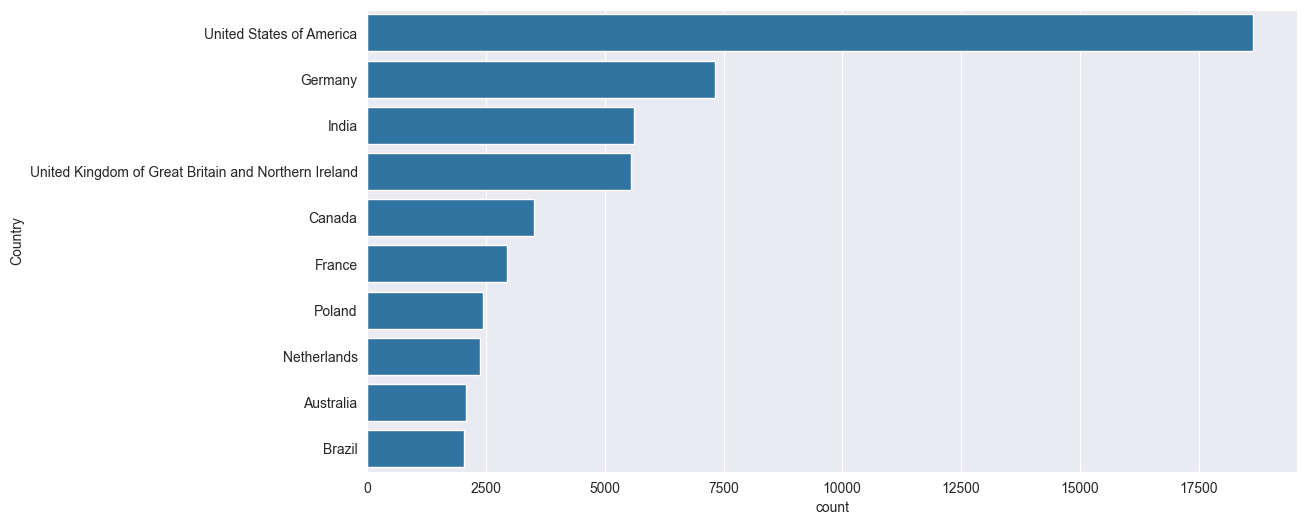

In [53]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))
sns.barplot(y=country_count.index,x=country_count);


## Developers VS Non-Developers

In [107]:
schema_2023.loc[schema_2023.question.str.contains("main"),"question"]

Series([], Name: question, dtype: object)

In [105]:
developers_per = survey_df.MainBranch.value_counts(normalize=True)*100
developers_per

MainBranch
I am a developer by profession                                                           75.391326
I am not primarily a developer, but I write code sometimes as part of my work/studies    10.039917
I am learning to code                                                                     5.562657
I code primarily as a hobby                                                               5.561536
I used to be a developer by profession, but no longer am                                  2.086697
None of these                                                                             1.357867
Name: proportion, dtype: float64

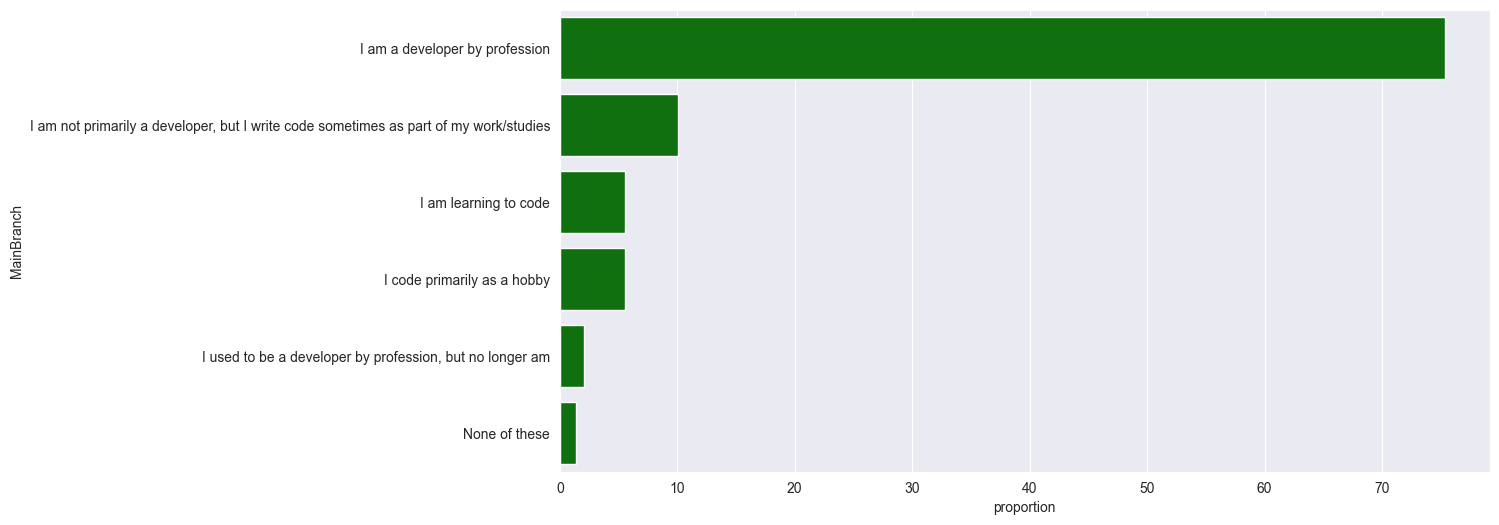

In [112]:
plt.figure(figsize=(12,6))
sns.barplot(y=developers_per.index,x=developers_per,color='green');


In [114]:
ages = survey_df.Age.value_counts()
ages

Age
25-34 years old       33247
35-44 years old       20532
18-24 years old       17931
45-54 years old        8334
Under 18 years old     4128
55-64 years old        3392
65 years or older      1171
Prefer not to say       449
Name: count, dtype: int64

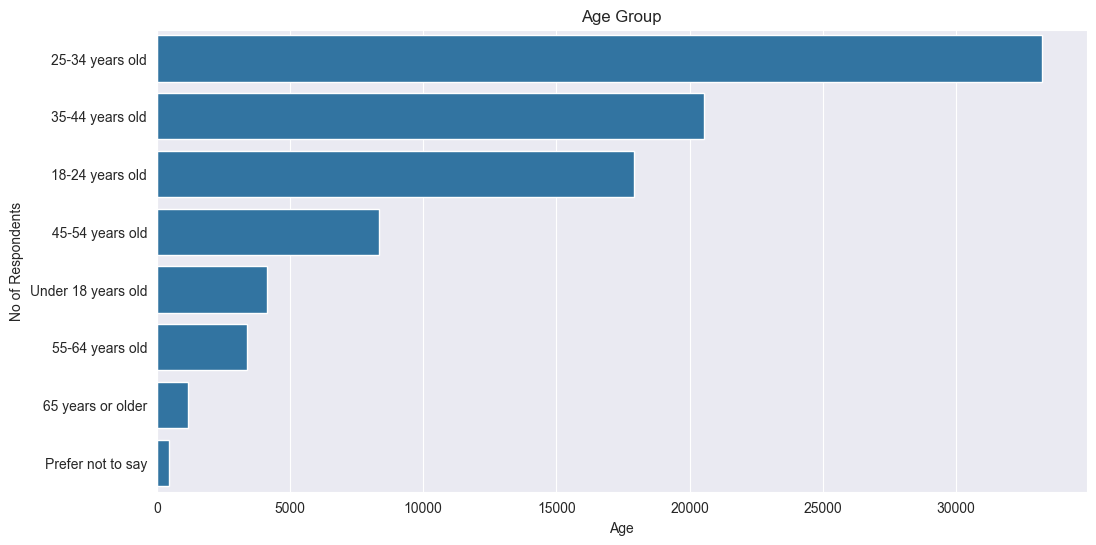

In [117]:
plt.figure(figsize=(12,6))
plt.title("Age Group")
plt.xlabel("Age")
plt.ylabel("No of Respondents")
sns.barplot(x=ages.values,y=ages.index);

## Education Level

In [125]:
ed_question = schema_2023.loc[11,"question"]
ed_question

'Which of the following best describes the highest level of formal education that you’ve completed? *'

In [122]:
survey_df.EdLevel.unique()

array([nan, 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Primary/elementary school',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Something else'], dtype=object)

In [123]:
ed_level = survey_df.EdLevel.value_counts()
ed_level

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          36706
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       20543
Some college/university study without earning a degree                                11753
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     8897
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         3887
Associate degree (A.A., A.S., etc.)                                                    2807
Primary/elementary school                                                              1905
Something else                                                                         1475
Name: count, dtype: int64

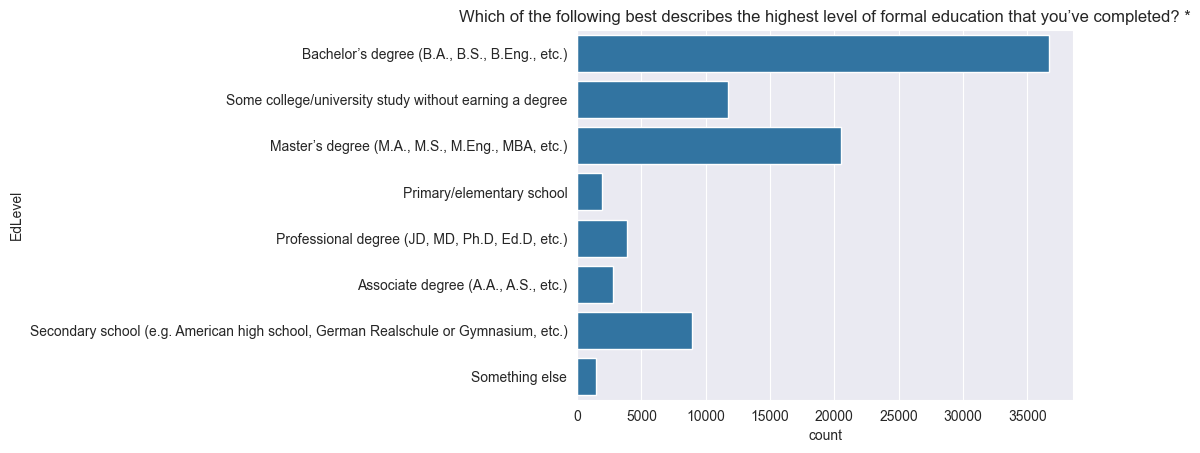

In [127]:
sns.countplot(y=survey_df.EdLevel)
plt.title(ed_question);

## Years Of Coding

In [132]:
schema_2023.loc[schema_2023.question.str.contains("years"),"question"]
question_for_coding = schema_2023.loc[15,'question']
question_for_coding

'Including any education, how many years have you been coding in total?'

In [140]:
years_of_code = survey_df.groupby('Age')[["YearsCode"]].mean()
years_of_code

,YearsCode
Age,
18-24 years old,5.802984
25-34 years old,10.303960
35-44 years old,18.494163
45-54 years old,28.371984
55-64 years old,35.164735
65 years or older,37.771605
Prefer not to say,14.209220
Under 18 years old,4.199530


<Axes: title={'center': 'Including any education, how many years have you been coding in total?'}, xlabel='Years of Code Percentages', ylabel='Years Old Group'>

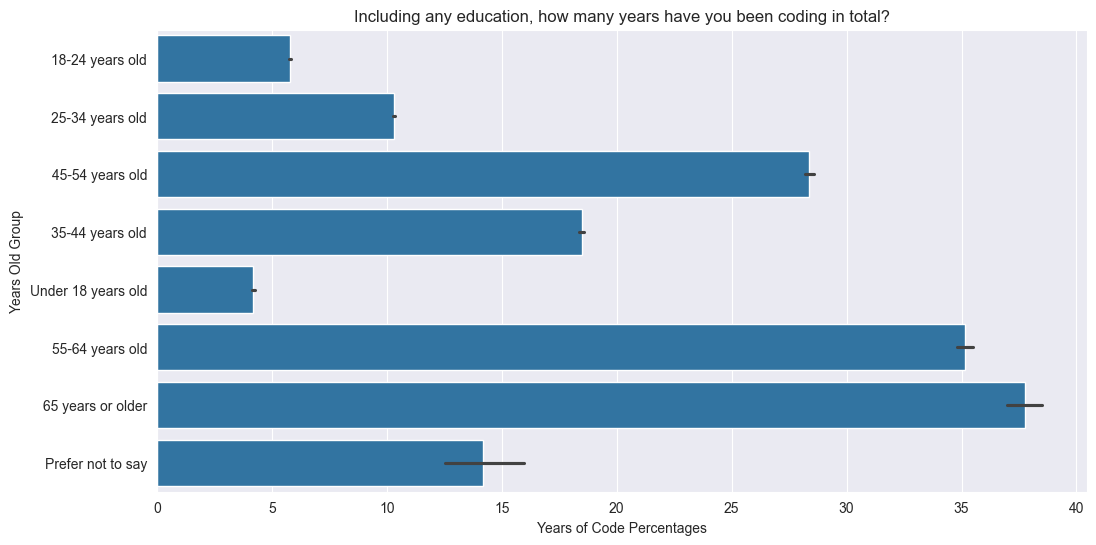

In [146]:
plt.figure(figsize=(12,6))
plt.title(question_for_coding)
plt.xlabel("Years of Code Percentages")
plt.ylabel("Years Old Group")
sns.barplot(x=survey_df.YearsCode,y=survey_df.Age)

In [7]:
selected_columns

['ResponseId',
 'Country',
 'Age',
 'MainBranch',
 'EdLevel',
 'YearsCode',
 'YearsCodePro',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'DatabaseHaveWorkedWith',
 'AIToolInterested in Using',
 'Employment',
 'DevType',
 'RemoteWork',
 'ProfessionalTech']

## Language Have Worked with

In [12]:
schema_2023.loc[26,"question"]

'Which <b>programming, scripting, and markup languages</b> have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [13]:
## spliting multicolumns

def split_multicolumns(col_series):
    result_df = col_series.to_frame()
    options = []

    for idx, value in col_series[col_series.notnull()].items():
        for option in value.split(';'):
            if option not in result_df.columns:
                options.append(option)
                result_df[option] = False

            result_df.at[idx, option] = True
    return result_df[options]


In [14]:
languages_worked = split_multicolumns(survey_df.LanguageHaveWorkedWith)
languages_worked

,HTML/CSS,JavaScript,Python,Bash/Shell (all shells),Go,PHP,Ruby,SQL,TypeScript,Ada,...,GDScript,Crystal,Cobol,Fortran,Prolog,Erlang,Apex,SAS,Nim,Flow
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,True,False,True,False,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
4,True,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89179,True,True,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
89180,False,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
89181,False,False,True,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
89182,True,True,True,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
languages_worked_per = languages_worked.mean()* 100
languages_worked_per

HTML/CSS                   52.022784
JavaScript                 62.467483
Python                     48.392088
Bash/Shell (all shells)    31.789334
Go                         12.997847
PHP                        18.247668
Ruby                        6.115447
SQL                        47.792205
TypeScript                 38.169403
Ada                         0.759105
Clojure                     1.239011
Elixir                      2.273950
Java                       30.002018
Lisp                        1.504754
OCaml                       0.688464
Raku                        0.174919
Scala                       2.715734
Swift                       4.565841
Zig                         0.817411
Rust                       12.812836
C#                         27.127063
PowerShell                 13.345443
C++                        22.015160
Kotlin                      8.897336
Solidity                    1.309652
C                          18.994438
Perl                        2.411868
D

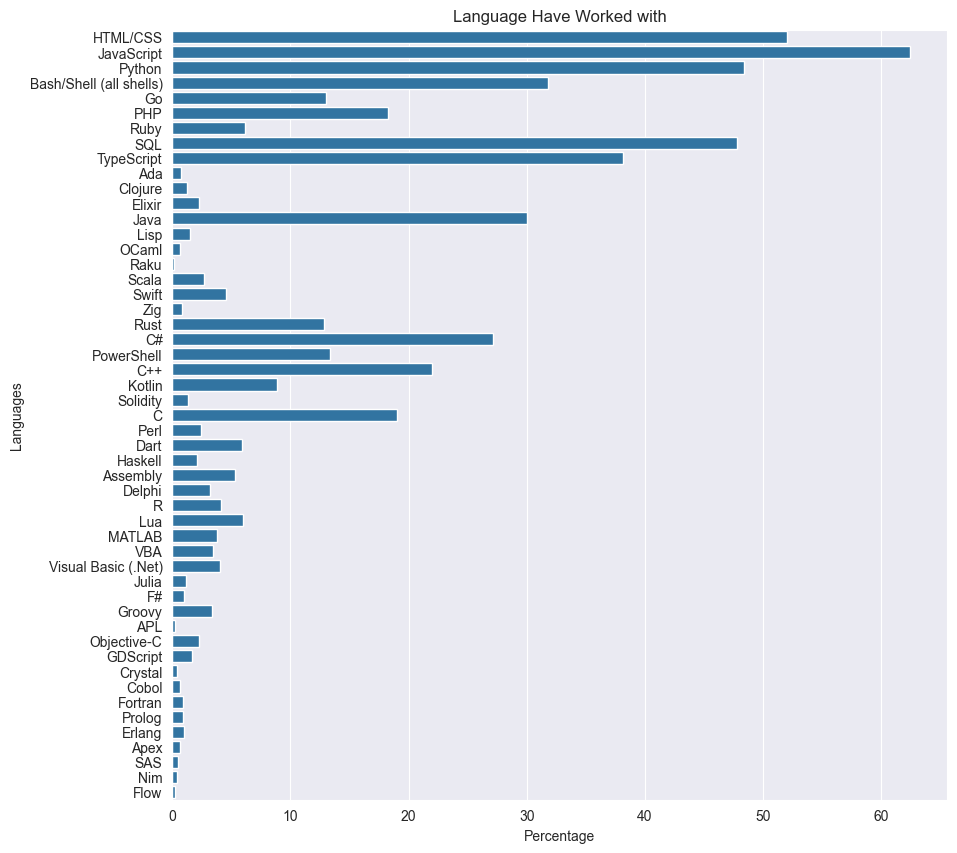

In [32]:
plt.figure(figsize=(10,10))
plt.title("Language Have Worked with")
plt.xlabel("Percentage")
plt.ylabel("Languages")
sns.set_style("darkgrid")
sns.barplot(x=languages_worked_per,y=languages_worked_per.index);

## Languages want to work with

In [16]:
languages_want_worked = split_multicolumns(survey_df.LanguageWantToWorkWith)
languages_want_worked

,Bash/Shell (all shells),C#,Dart,Elixir,GDScript,HTML/CSS,JavaScript,Rust,Haskell,OCaml,...,Prolog,Erlang,Objective-C,Crystal,Fortran,SAS,Apex,Raku,Cobol,Flow
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,True,True,True,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89179,True,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
89180,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
89181,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
89182,True,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
languages_want_worked_per = languages_want_worked.mean()* 100
languages_want_worked_per

Bash/Shell (all shells)    20.495829
C#                         20.847910
Dart                        6.790456
Elixir                      4.350556
GDScript                    1.754799
HTML/CSS                   33.557589
JavaScript                 39.229010
Rust                       29.949318
Haskell                     3.767492
OCaml                       1.214343
Ruby                        4.813644
TypeScript                 36.167922
Python                     38.925144
Go                         20.175144
Julia                       2.448870
R                           3.440079
Scala                       3.105938
SQL                        33.187567
Zig                         4.089299
Assembly                    4.294492
C                          11.245291
C++                        15.956898
Java                       16.128454
Kotlin                     11.838446
Delphi                      2.184248
PHP                         8.985917
Ada                         0.740043
L

In [37]:
languages_want_worked_per.describe()

count    51.000000
mean      8.227625
std      11.375395
min       0.202951
25%       1.139218
50%       2.448870
75%      10.115604
max      39.229010
dtype: float64

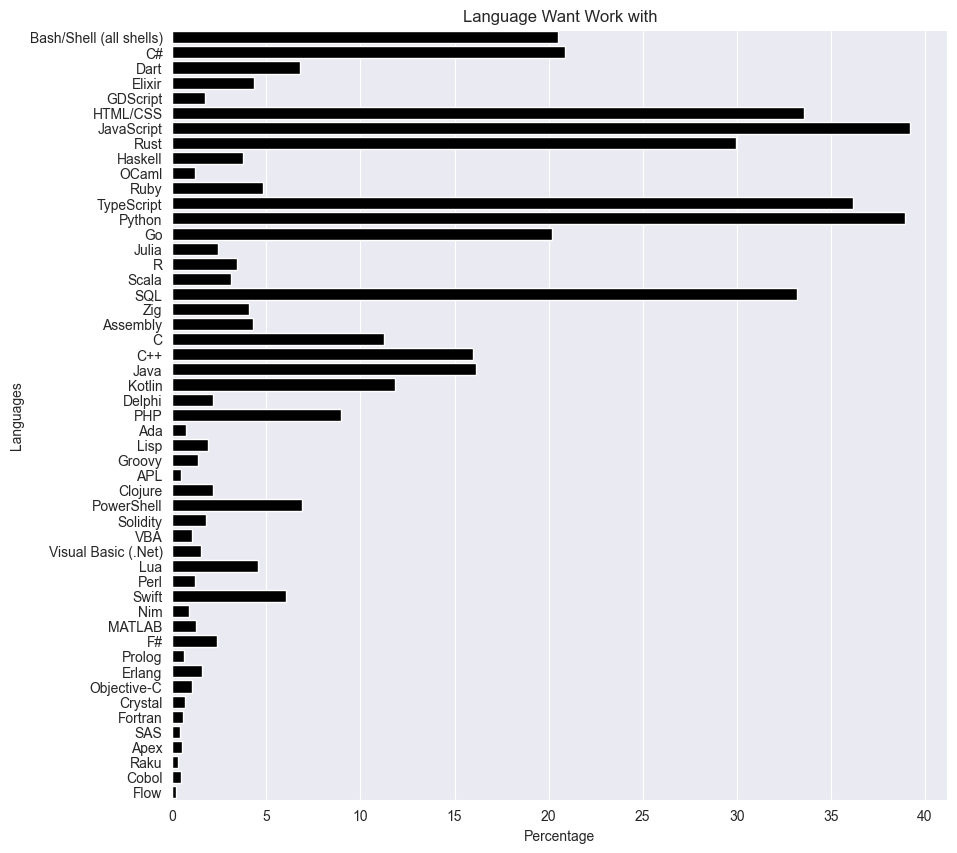

In [36]:
plt.figure(figsize=(10,10))
plt.title("Language Want Work with")
plt.xlabel("Percentage")
plt.ylabel("Languages")
sns.set_style("darkgrid")
sns.barplot(x=languages_want_worked_per,y=languages_want_worked_per.index, color="black");

## Which Language Want to Continue Learn in 2024

In [25]:
language_loved = languages_worked & languages_want_worked
language_loved

,APL,Ada,Apex,Assembly,Bash/Shell (all shells),C,C#,C++,Clojure,Cobol,...,Rust,SAS,SQL,Scala,Solidity,Swift,TypeScript,VBA,Visual Basic (.Net),Zig
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89179,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
89180,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
89181,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
89182,False,False,False,False,True,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False


In [27]:
language_loved_percentage = (language_loved.sum()*100 / languages_worked.sum().sort_values(ascending=False))
language_loved_percentage

APL                        44.888889
Ada                        40.915805
Apex                       48.013817
Assembly                   39.448769
Bash/Shell (all shells)    60.385877
C                          43.293979
C#                         62.865292
C++                        49.770806
Clojure                    68.506787
Cobol                      20.312500
Crystal                    48.071979
Dart                       58.562488
Delphi                     62.769339
Elixir                     73.126233
Erlang                     55.184332
F#                         57.361602
Flow                       24.766355
Fortran                    24.369748
GDScript                   62.943144
Go                         62.448240
Groovy                     29.973118
HTML/CSS                   61.904043
Haskell                    52.214325
Java                       44.111821
JavaScript                 57.827000
Julia                      62.772277
Kotlin                     60.768746
L

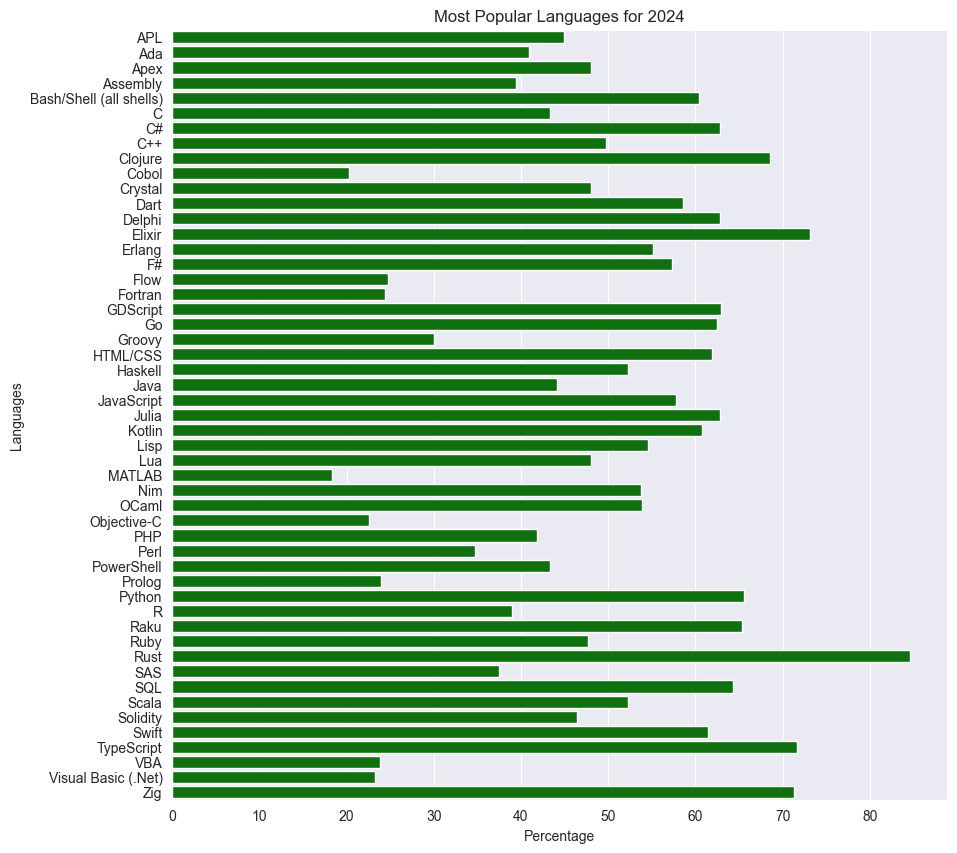

In [28]:
plt.figure(figsize=(10,10))
plt.title("Most Popular Languages for 2024")
plt.xlabel("Percentage")
plt.ylabel("Languages")
sns.set_style("darkgrid")
sns.barplot(x=language_loved_percentage,y=language_loved_percentage.index, color="green");

## AI TOOL Users

In [40]:

matched_questions = schema_2023.loc[46, "question"]
matched_questions

'Do you currently use AI tools in your development process? *'

In [29]:
ai_tools = split_multicolumns(survey_df["AIToolInterested in Using"])
ai_tools

,Learning about a codebase,Writing code,Debugging and getting help,Project planning,Testing code,Committing and reviewing code,Deployment and monitoring,Collaborating with teammates,Documenting code,Other (please describe)
0,False,False,False,False,False,False,False,False,False,False
1,True,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...
89179,True,True,True,True,True,True,False,False,True,False
89180,False,True,False,False,True,False,False,False,True,False
89181,False,False,False,False,False,False,False,False,False,False
89182,True,True,True,True,True,False,True,True,True,False


In [30]:
ai_tools_per = ai_tools.sum().sort_values(ascending=False)
ai_tools_per

Testing code                     20807
Documenting code                 18945
Committing and reviewing code    18670
Learning about a codebase        18467
Deployment and monitoring        17137
Debugging and getting help       15335
Project planning                 14534
Collaborating with teammates     11305
Writing code                      8945
Other (please describe)            286
dtype: int64

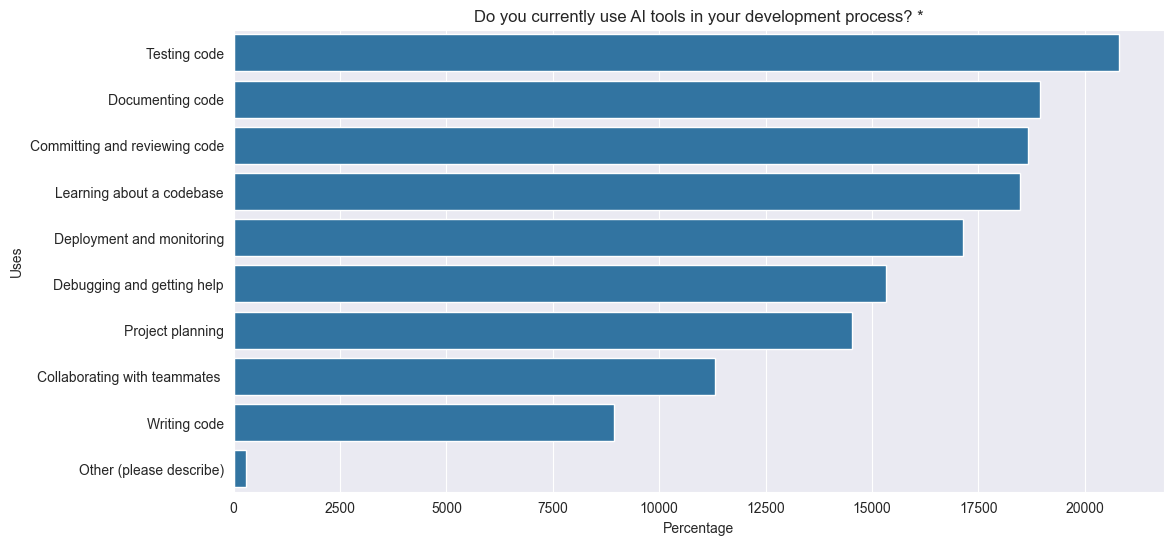

In [41]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))
plt.title(matched_questions)
plt.xlabel("Percentage")
plt.ylabel("Uses")
sns.barplot(x=ai_tools_per,y=ai_tools_per.index);

## Remote Worker

In [49]:
remote_work_per = survey_df["RemoteWork"].value_counts(normalize=True)*100
remote_work_per

RemoteWork
Hybrid (some remote, some in-person)    42.177212
Remote                                  41.411733
In-person                               16.411055
Name: proportion, dtype: float64

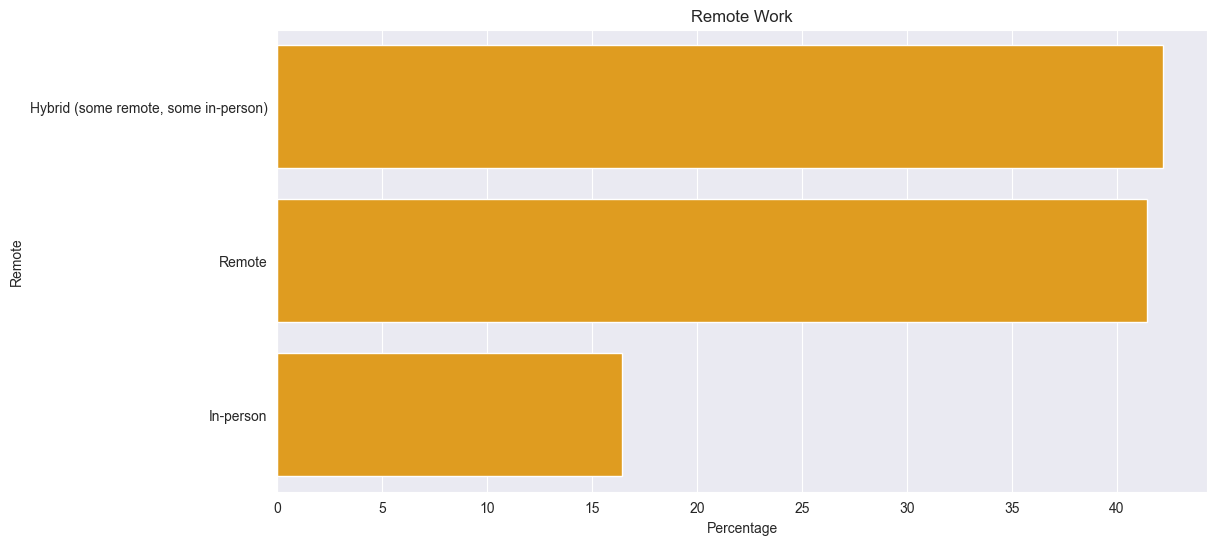

In [50]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))
plt.title("Remote Work")
plt.xlabel("Percentage")
plt.ylabel("Remote")
sns.barplot(x=remote_work_per,y=remote_work_per.index,color="orange");